In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import  numpy as np
df=pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df.info()

In [ ]:
#lets check for missing data
def missing_data():
    total = df.isnull().sum().sort_values(ascending=False)
    percent = 100 * (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return  missing_data
missing_data = missing_data()

missing_data.head(100)

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
df['BusinessTravel'].astype('category').value_counts()
df['Department'].astype('category').value_counts()
df['Over18'].astype('category').value_counts()
df['MaritalStatus'].astype('category').value_counts()
df['OverTime'].astype('category').value_counts()


In [ ]:
# List of variables to map

varlist =  ['Attrition','OverTime']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
df.head()

In [ ]:
# List of variables to map

varlist =  ['Over18']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
df.head()

In [ ]:
# List of variables to map

varlist =  ['Gender']

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
df.head()

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
#lets check for missing data
def missing_data():
    total = df.isnull().sum().sort_values(ascending=False)
    percent = 100 * (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return  missing_data
missing_data = missing_data()

missing_data.head(100)

In [ ]:
#Get the non numeric columns in the data frame
non_numeric = df.select_dtypes(['object'])
#Strip the whitespaces
df[non_numeric.columns] = non_numeric.apply(lambda x: x.str.strip())

In [ ]:
#Convert all the non numeric columns to upper case
df[non_numeric.columns] = non_numeric.apply(lambda x: x.str.upper())

In [ ]:
# convert into dummies
dummies = pd.get_dummies(non_numeric, drop_first=True)
dummies.head()

In [ ]:
non_numeric.columns

In [ ]:
# drop categorical variables 
df=df.drop(list(non_numeric.columns), axis=1)

In [ ]:
df.head()

In [ ]:
# concat dummy variables with X
df_final= pd.concat([df,dummies], axis=1)

In [ ]:
df_final.head()

In [ ]:
df_final.shape

In [ ]:
#To check the most correlated feature

cor_mat= df_final[:].corr()
cor=cor_mat.sort_values(['Attrition'],ascending=False)
print("The most correlated/important features (numeric) for the target are :")
cor.Attrition

In [ ]:
df_final.head()

In [ ]:
#lets check for missing data
def missing_data():
    total = df_final.isnull().sum().sort_values(ascending=False)
    percent = 100 * (df_final.isnull().sum()/df_final.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return  missing_data
missing_data = missing_data()

missing_data.head(100)

In [ ]:
# Univariate Analysis

sns.countplot(x='Attrition',data=df_final)

In [ ]:
#Get only the data where the customers churned
Attrition_total = df_final[df_final['Attrition']==1]

In [ ]:
#No of churned datapoints
print(len(Attrition_total))

#No of non churned customers
print(len(df_final[df_final['Attrition']==0]))

In [ ]:
#Import scale package
from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(df_final.drop(['Attrition'],axis=1)))
#Get independent variable into new dataframe
y = df_final['Attrition']
#Get independent columns and update dataframe
X.columns=df_final.drop('Attrition',axis=1).columns

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Importing metrics for evalutation from  from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score

In [ ]:
X_train.info()

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
#df with attrition

y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['EmployeeNumber'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

In [ ]:
 #Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
#ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

In [ ]:
#optimal cutoff

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
#try precision and recall

confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
confusion

In [ ]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
#RECALL
confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Attrition, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

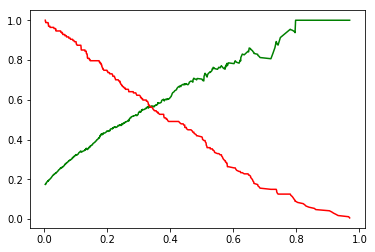

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [99]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()


In [100]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
# Making predictions
predictions_rf = rfc.predict(X_test)

In [102]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       371
           1       0.50      0.14      0.22        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.68      0.56      0.57       441
weighted avg       0.80      0.84      0.80       441



In [104]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(accuracy_score(y_test,predictions_rf))

0.8412698412698413


In [107]:
# Grid Search to Find Optimal Hyperparameters

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [116]:
scoring = {'AUC': 'roc_auc'}
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(50,100,200),
    'min_samples_split': range(50,100,200),
    'n_estimators': [100,200,300], 
    'max_features': [10,15,20],
    'criterion': ["entropy", "gini"]
}


rf = RandomForestClassifier(class_weight='balanced_subsample')

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring='roc_auc')

grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   55.6s finished


In [117]:
# printing the optimal precision score and hyperparameters

print('Precision of',grid_search.best_score_,'using',grid_search.best_params_)

Precision of 0.8037512230407159 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [118]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=15,
                             n_estimators=100,
                             criterion='entropy',
                             class_weight='balanced_subsample')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=8, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [119]:
# Evaluation Metrics

predictions = rfc.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[284  87]
 [ 29  41]]


In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       371
           1       0.32      0.59      0.41        70

   micro avg       0.74      0.74      0.74       441
   macro avg       0.61      0.68      0.62       441
weighted avg       0.81      0.74      0.76       441



In [121]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(accuracy_score(y_test,predictions))

0.7369614512471655
